In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
raw_data = pd.read_csv("raw_data.csv")
raw_data.sample(5)

,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,ASPONOWN_A,ASPMEDSTP_A,ASPMEDNOWN_A,ASPMEDEV_A,LSROTATE_FLG,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,DISAB3_A,K6SPD_A,SCHDYMSSTC_A,AFNOW,REPWRKDYTC_A,YRSINUS_A,CITZNSTP_A,PRTNREDUCP_A,SPOUSEDUCP_A,LEGMSTAT_A,MARSTAT_A,SASPPRACE_A,SASPPHISP_A,PRTNRAGETC_A,SPOUSAGETC_A,PRTNRWKFT_A,PRTNRWRK_A,SPOUSWKFT_A,SPOUSWRK_A,SPOUSESEX_A,PRTNRSEX_A,INJWRKDYTC_A,NUMINJTC_A,SHINGRXYRP_A,ZOSTAVXYRP_A,HHRESPSA_FLG,PCNTADTWFP_A,PCNTADTWKP_A,FDSCAT4_A,FDSCAT3_A,EPINUMSEZP_A,EMPDYSMSS3_A,EMPLSTWOR1_A,EMPWRKFT1_A,EMPWRKLSW1_A,EMPWKHRS3_A,EMDOCCUPN2_A,EMDOCCUPN1_A,EMDINDSTN2_A,EMDINDSTN1_A,DIBAGETC_A,DIFYRSTC1_A,SMKECIGST_A,SMKCIGST_A,BMICAT_A,WEIGHTLBTC_A,HEIGHTTC_A,URGNT12MTC_A,EMERG12MTC_A,CLSWRKNOS1_A,CLSWRKSD1_A,JOBANYSD1_A,DIBA1CNMT_A,PCNT18UPTC,PCNTLT18TC,LSATIS4R_A,LSATIS11R_A,COVER65_A,COVER_A,EXCHANGE_A,NOTCOV_A,MILSPC1R_A,OGFLG_A,OPFLG_A,CHFLG_A,MAFLG_A,PLNWRKR2_A,PLNWRKR1_A,RSNHIMISS_A,RSNHIJOB_A,MCADVR_A,PRFLG_A,PLEXCHPR1_A,PRPREM1_A,PXCHNG1_A,HICOSTR2_A,HICOSTR1_A,OTHGOV_A,OTHPUB_A,IHS_A,MILITARY_A,CHIP_A,MEDICAID_A,MEDICARE_A,PRIVATE_A,PRPLCOV1_C_A,PRPLCOV2_C_A,PLEXCHOG_A,PLEXCHOP_A,EXCHPR2_A,EXCHPR1_A,EDUCP_A,MAXEDUCP_A,PARSTAT_A,SAPARENTSC_A,MLTFAMFLG_A,OVER65FLG_A,PCNTADLT_A,PCNTKIDS_A,NUMCAN_A,COLRCAGETC_A,HDNCKAGETC_A,OTHERAGETC_A,UTERUAGETC_A,THYROAGETC_A,THROAAGETC_A,STOMAAGETC_A,SKNDKAGETC_A,SKNNMAGETC_A,SKNMAGETC_A,RECTUAGETC_A,PROSTAGETC_A,PANCRAGETC_A,OVARYAGETC_A,MOUTHAGETC_A,MELANAGETC_A,LYMPHAGETC_A,LUNGAGETC_A,LIVERAGETC_A,LEUKEAGETC_A,LARYNAGETC_A,GALLBAGETC_A,ESOPHAGETC_A,COLONAGETC_A,CERVIAGETC_A,BREASAGETC_A,BRAINAGETC_A,BONEAGETC_A,BLOODAGETC_A,BLADDAGETC_A,OTHERCANP_A,COLRCCAN_A,HDNCKCAN_A,UTERUCAN_A,THYROCAN_A,THROACAN_A,STOMACAN_A,SKNDKCAN_A,SKNNMCAN_A,SKNMCAN_A,RECTUCAN_A,PROSTCAN_A,PANCRCAN_A,OVARYCAN_A,MOUTHCAN_A,MELANCAN_A,LYMPHCAN_A,LUNGCAN_A,LIVERCAN_A,LEUKECAN_A,LARYNCAN_A,GALLBCAN_A,ESOPHCAN_A,COLONCAN_A,CERVICAN_A,BREASCAN_A,BRAINCAN_A,BONECAN_A,BLOODCAN_A,BLADDCAN_A,HISDETP_A,HISP_A,REGION,INTV_QRT,SRVY_YR,SEX_A,AGEP_A,AGE65,ASTATNEW,HOUGVASST_A,HOUTENURE_A,HOUYRSLIV_A,FDSNEDAYS_A,FDSNOTEAT_A,FDSWEIGHT_A,FDSHUNGRY_A,FDSLESS_A,FDSSKIPDYS_A,FDSSKIP_A,FDSBALANCE_A,FDSLAST_A,FDSRUNOUT_A,FLUNCH12M_A,FWIC12M_A,FSNAP30D_A,FSNAP12M_A,INCOTHR_A,INCRETIRE_A,INCWELF_A,SSISSDIDSB_A,SSISSDIBTH_A,INCSSISSDI_A,INCSSRR_A,INCINTER_A,INCWRKO_A,RJCLSOFT1_A,RJCLSNOSD1_A,RJCLSSD1_A,RECJOBSD1_A,SDMSRSOFT1_A,SDMSRS1_A,WRKCLSOFT1_A,WRKCLSNSD1_A,WRKCLSSD1_A,CURJOBSD1_A,JOBMISS_A,JOBWRKSICK_A,JOBLKYLOSS_A,JOBADVSCH_A,JOBVARYSCH_A,JOBCHGSCH_A,JOBSHIFT_A,JOBCHGEARN_A,JOBTAX_A,EMDWRKCAT1_A,EMDSUPER_A,EMPHEALINS_A,EMPSICKLV_A,EMPWHYNOT_A,SCHCURENR_A,NATUSBORN_A,VACAREEV_A,VAHOSP_A,VADISB_A,COMBAT_A,AFVETTRN_A,AFVET_A,EVRMARRIED_A,SPOUSEP_A,SPOUSLIV_A,MARITAL_A,ORIENT_A,CMPSUPPORT_A,SUPPORT_A,SMOKELSCUR_A,SMOKELSEV_A,PIPECUR_A,PIPEEV_A,CIGAR30D_A,CIGARCUR_A,CIGAREV_A,ECIGNOW_A,ECIGEV_A,CIG30D_A,SMK30D_A,CIGNOW_A,SMKNOW_A,SMKEV_A,TSTSMLAST_A,TSTSMHP_A,TASTEUNW_A,TASTEFLAV_A,TASTECOMP_A,TASTEDF_A,SMELLPHT_A,SMELLCOMP_A,SMELLDF_A,INJREDUCE_A,INJSTOPCHG_A,INJFUTWRK_A,INJSTITCH_A,INJBONES_A,INJHOSP_A,INJER_A,INJSAWDOC_A,INJCHORES_A,INJMVTYPE5_A,INJMVTYPE4_A,INJMVTYPE3_A,INJMVTYPE2_A,INJMVTYPE1_A,INJMOTOR_A,INJFALLWRK_A,INJFALLHOM_A,INJFALL_A,INJSPORTS_A,INJWORK_A,INJHOME_A,INJLIMIT_A,ANYINJURY_A,REPWRKCAUS_A,REPREDUCE_A,REPSTOPCHG_A,REPFUTWRK_A,REPSAWDOC_A,REPLIMIT_A,REPSTRAIN_A,PAITOOTH3M_A,PAIAPG3M_A,PAIHDFC3M_A,PAILLMB3M_A,PAIULMB3M_A,PAIBACK3M_A,PAIAFFM3M_A,PAIWKLM3M_A,PAIAMNT_A,PAIFRQ3M_A,WORTHLESS_A,EFFORT_A,HOPELESS_A,RESTLESS_A,NERVOUS_A,SAD_A,MHTHND_A,MHTHDLY_A,MHTPYNOW_A,MHTHRPY_A,MHRX_A,DEPLEVEL_A,DEPMED_A,DEPFREQ_A,ANXLEVEL_A,ANXMED_A,ANXFREQ_A,FAMCARECVD_A,FAMCAREDNG_A,FAMCARE12M_A,HOMECAREDG_A,HOMEHC12M_A,TRAVEL_A,WRKHLTHFC_A,WORKHEALTH_A,LIVEHEP_A,SHTHEPA_A,SHTHEPB_A,TDAPPREG_A,SHINGWHEN_A,SHINGRIXNB_A,SHINGRIX1_A,ZOSTAWHEN_A,ZOSTAVAX1_A,SHTSHINGLE_A,SHTPNEUNB_A,SHTPNUEV_A,FLUPREG2_A,FLUPREG_A,SHTFLUY_A,SHTFLUM_A,SHTF

In [3]:
cancer_data = raw_data[raw_data.PROSTCAN_A.notna()]
cancer_data.shape

(1546, 622)

In [14]:
missing_pct = cancer_data.isna().mean()
low_missingness_columns = missing_pct[missing_pct == 0].index
cancer_reduced_missing = cancer_data[low_missingness_columns]
cancer_reduced_missing.shape

(1546, 216)

In [8]:
cancer_reduced_missing.sample(5)

,URBRRL,RATCAT_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,DISAB3_A,K6SPD_A,CITZNSTP_A,LEGMSTAT_A,MARSTAT_A,PCNTADTWFP_A,PCNTADTWKP_A,FDSCAT4_A,FDSCAT3_A,EMPWRKLSW1_A,SMKECIGST_A,SMKCIGST_A,BMICAT_A,WEIGHTLBTC_A,HEIGHTTC_A,URGNT12MTC_A,EMERG12MTC_A,PCNT18UPTC,PCNTLT18TC,LSATIS4R_A,LSATIS11R_A,NOTCOV_A,OTHGOV_A,OTHPUB_A,IHS_A,MILITARY_A,CHIP_A,MEDICAID_A,MEDICARE_A,PRIVATE_A,EDUCP_A,PARSTAT_A,SAPARENTSC_A,MLTFAMFLG_A,OVER65FLG_A,PCNTADLT_A,PCNTKIDS_A,NUMCAN_A,OTHERCANP_A,COLRCCAN_A,HDNCKCAN_A,THYROCAN_A,THROACAN_A,STOMACAN_A,SKNDKCAN_A,SKNNMCAN_A,SKNMCAN_A,RECTUCAN_A,PROSTCAN_A,PANCRCAN_A,MOUTHCAN_A,MELANCAN_A,LYMPHCAN_A,LUNGCAN_A,LIVERCAN_A,LEUKECAN_A,LARYNCAN_A,GALLBCAN_A,ESOPHCAN_A,COLONCAN_A,BREASCAN_A,BRAINCAN_A,BONECAN_A,BLOODCAN_A,BLADDCAN_A,HISDETP_A,HISP_A,REGION,INTV_QRT,SRVY_YR,SEX_A,AGEP_A,ASTATNEW,HOUTENURE_A,HOUYRSLIV_A,FDSBALANCE_A,FDSLAST_A,FDSRUNOUT_A,FSNAP12M_A,INCINTER_A,INCWRKO_A,SCHCURENR_A,NATUSBORN_A,AFVET_A,MARITAL_A,ORIENT_A,CMPSUPPORT_A,SUPPORT_A,SMOKELSEV_A,PIPEEV_A,CIGAREV_A,ECIGEV_A,SMKEV_A,TASTEUNW_A,TASTEFLAV_A,TASTECOMP_A,TASTEDF_A,SMELLPHT_A,SMELLCOMP_A,SMELLDF_A,ANYINJURY_A,REPSTRAIN_A,PAIFRQ3M_A,WORTHLESS_A,EFFORT_A,HOPELESS_A,RESTLESS_A,NERVOUS_A,SAD_A,MHTHND_A,MHTHDLY_A,MHTHRPY_A,DEPMED_A,DEPFREQ_A,ANXMED_A,ANXFREQ_A,FAMCAREDNG_A,FAMCARE12M_A,HOMECAREDG_A,HOMEHC12M_A,TRAVEL_A,WORKHEALTH_A,SHTHEPA_A,SHTHEPB_A,SHTPNUEV_A,SHTFLU12M_A,CHOLLAST_A,BPLAST_A,RXDG12M_A,RX12M_A,CANCOVOTH_A,CANCOVTREA_A,VIRAPP12M_A,DNGCARE_A,DLYCARE_A,MEDNG12M_A,MEDDL12M_A,HOSPONGT_A,USUALPL_A,LASTDR_A,COVIDTEST_A,CVDDIAG_A,PAYWORRY_A,PAYBLL12M_A,SINCOVRX_A,SINCOVVS_A,SINCOVDE_A,HIKIND10_A,HIKIND09_A,HIKIND08_A,HIKIND07_A,HIKIND06_A,HIKIND05_A,HIKIND04_A,HIKIND03_A,HIKIND02_A,HIKIND01_A,HICOV_A,SOCWRKLIM_A,SOCSCLPAR_A,SOCERRNDS_A,UPPOBJCT_A,UPPRAISE_A,UPPSLFCR_A,COGMEMDFF_A,COMUSESL_A,COMDIFF_A,EQUIP_A,DIFF_A,HEARINGDF_A,HEARAID_A,VISIONDF_A,WEARGLSS_A,CURSKIN_A,CURFOOD_A,CURRESP_A,EPIEV_A,HLTHCOND_A,MEDRXTRT_A,DRYMTH12M_A,COLDFLU12M_A,CFSEV_A,LIVEREV_A,HEPEV_A,KIDWEAKEV_A,DEPEV_A,ANXEV_A,DEMENEV_A,ARTHEV_A,COPDEV_A,DIBEV_A,PREDIB_A,CANEV_A,ASEV_A,STREV_A,MIEV_A,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
7598,3,14,2,4,100,2,1,2,2,1,3,1,0,0,1,1,2,3,4,2,166,70,0,0,2,0,2,99,2,3,3,2,3,3,3,1,1,9,3,3,2,1,2,0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,4,2,2021,1,85,1,1,4,3,3,3,2,1,2,2,1,1,1,5,9,1,2,1,1,2,2,1,3,3,1,2,3,1,2,2,3,5,4,5,5,5,5,2,2,2,2,5,9,4,2,2,2,2,1,2,2,2,1,1,1,1,2,1,2.0,2.0,2,2,1,2,2,2,1,1,1,2,3,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,2,2,1,1,1,2,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,3,1,1,4,10,1,7149.101,H066370,11.00
28683,4,14,0,2,116,2,1,2,2,1,3,1,2,2,1,1,1,3,4,2,151,70,0,0,2,0,2,8,2,3,3,2,3,3,3,1,1,5,3,3,2,1,2,0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,1,4,2021,1,70,1,1,5,3,3,3,2,1,1,2,1,2,1,2,3,1,2,2,2,2,2,2,3,3,1,2,3,1,2,2,4,5,4,5,5,5,5,2,2,2,2,4,2,3,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2.0,2.0,2,2,2,2,2,2,1,1,2,2,3,2,1,2,1,2,2,2,2,2,2,2,1,1,2,1,2,1,1,1,1,1,1,2,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,3,1,1,12,10,1,6533.629,H032215,5.11
20498,3,11,0,1,107,2,1,1,2,1,5,4,0,0,1,1,2,3,3,3,165,65,0,0,1,0,2,8,2,3,3,2,3,3,3,1,1,9,3,3,2,1,1,0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,2,3,2021,1,85,1,1,5,3,3,3,2,1,2,2,1,2,3,2,3,2,1,1,1,2,1,2,3,3,1,2,2,3,2,2,2,5,3,5,5,5,5,2,2,2,2,4,2,4,2,2,2,1,2,2,2,2,1,1,1,1,2,1,2.0,2.0,2,2,2,2,2,2,1,1,1,2,3,2,1,2,2,2,2,2,2,2,2,2,1,1,2,1,2,1,2,1,1,1,1,2,1,2,1,1,2,3,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,1,1,1,2,1,1,9,10,1,3758.908,H026417,3.62
9990,1,1,0,9,151,2,1,2,2,1,4,7,0,1,1,1,1,3,3,4,240,74,0,0,1,0,3,5,2,3,3,2,3,3,3,3,1,7,3,3,2,0,1,0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,

In [15]:
print("Number of unique values in column HHX", cancer_reduced_missing.HHX.nunique())
cancer_reduced_missing = cancer_reduced_missing.drop(["HHX"], axis="columns")
print("Shape of data after removing column HHX: ",cancer_reduced_missing.shape)
features = cancer_reduced_missing.drop(["PROSTCAN_A"], axis="columns")
print("Shape of data with only independent variables",features.shape)

Number of unique values in column HHX 1546
Shape of data after removing column HHX:  (1546, 215)
Shape of data with only independent variables (1546, 214)


### I will be showing the variance of each column and removing columns with 0 variance. Such columns have only one value for all the rows/observations. Hence they are not useful. It may also be useful to remove some other features which do not have 0 variance but near 0 variance.

In [17]:
selector = VarianceThreshold()
selector.fit(features)

variances = pd.DataFrame({"features": features.columns, "variance":selector.variances_})
variances.sort_values(by=["variance"])

,features,variance
211,IMPNUM_A,0.000000
210,RECTYPE,0.000000
208,HHSTAT_A,0.000000
75,SRVY_YR,0.000000
76,SEX_A,0.000000
198,CANEV_A,0.000000
40,MLTFAMFLG_A,0.009608
171,COMUSESL_A,0.011507
163,HICOV_A,0.014656
188,LIVEREV_A,0.015909


In [18]:
non_zero_var_columns = variances[variances.variance > 0 ]['features'].tolist()
feature_data = features[non_zero_var_columns]
target_variable = cancer_data["PROSTCAN_A"]

In [21]:
feature_data.describe()

,URBRRL,RATCAT_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,DISAB3_A,K6SPD_A,CITZNSTP_A,LEGMSTAT_A,MARSTAT_A,PCNTADTWFP_A,PCNTADTWKP_A,FDSCAT4_A,FDSCAT3_A,EMPWRKLSW1_A,SMKECIGST_A,SMKCIGST_A,BMICAT_A,WEIGHTLBTC_A,HEIGHTTC_A,URGNT12MTC_A,EMERG12MTC_A,PCNT18UPTC,PCNTLT18TC,LSATIS4R_A,LSATIS11R_A,NOTCOV_A,OTHGOV_A,OTHPUB_A,IHS_A,MILITARY_A,CHIP_A,MEDICAID_A,MEDICARE_A,PRIVATE_A,EDUCP_A,PARSTAT_A,SAPARENTSC_A,MLTFAMFLG_A,OVER65FLG_A,PCNTADLT_A,PCNTKIDS_A,NUMCAN_A,OTHERCANP_A,COLRCCAN_A,HDNCKCAN_A,THYROCAN_A,THROACAN_A,STOMACAN_A,SKNDKCAN_A,SKNNMCAN_A,SKNMCAN_A,RECTUCAN_A,PANCRCAN_A,MOUTHCAN_A,MELANCAN_A,LYMPHCAN_A,LUNGCAN_A,LIVERCAN_A,LEUKECAN_A,LARYNCAN_A,GALLBCAN_A,ESOPHCAN_A,COLONCAN_A,BREASCAN_A,BRAINCAN_A,BONECAN_A,BLOODCAN_A,BLADDCAN_A,HISDETP_A,HISP_A,REGION,INTV_QRT,AGEP_A,ASTATNEW,HOUTENURE_A,HOUYRSLIV_A,FDSBALANCE_A,FDSLAST_A,FDSRUNOUT_A,FSNAP12M_A,INCINTER_A,INCWRKO_A,SCHCURENR_A,NATUSBORN_A,AFVET_A,MARITAL_A,ORIENT_A,CMPSUPPORT_A,SUPPORT_A,SMOKELSEV_A,PIPEEV_A,CIGAREV_A,ECIGEV_A,SMKEV_A,TASTEUNW_A,TASTEFLAV_A,TASTECOMP_A,TASTEDF_A,SMELLPHT_A,SMELLCOMP_A,SMELLDF_A,ANYINJURY_A,REPSTRAIN_A,PAIFRQ3M_A,WORTHLESS_A,EFFORT_A,HOPELESS_A,RESTLESS_A,NERVOUS_A,SAD_A,MHTHND_A,MHTHDLY_A,MHTHRPY_A,DEPMED_A,DEPFREQ_A,ANXMED_A,ANXFREQ_A,FAMCAREDNG_A,FAMCARE12M_A,HOMECAREDG_A,HOMEHC12M_A,TRAVEL_A,WORKHEALTH_A,SHTHEPA_A,SHTHEPB_A,SHTPNUEV_A,SHTFLU12M_A,CHOLLAST_A,BPLAST_A,RXDG12M_A,RX12M_A,CANCOVOTH_A,CANCOVTREA_A,VIRAPP12M_A,DNGCARE_A,DLYCARE_A,MEDNG12M_A,MEDDL12M_A,HOSPONGT_A,USUALPL_A,LASTDR_A,COVIDTEST_A,CVDDIAG_A,PAYWORRY_A,PAYBLL12M_A,SINCOVRX_A,SINCOVVS_A,SINCOVDE_A,HIKIND10_A,HIKIND09_A,HIKIND08_A,HIKIND07_A,HIKIND06_A,HIKIND05_A,HIKIND04_A,HIKIND03_A,HIKIND02_A,HIKIND01_A,HICOV_A,SOCWRKLIM_A,SOCSCLPAR_A,SOCERRNDS_A,UPPOBJCT_A,UPPRAISE_A,UPPSLFCR_A,COGMEMDFF_A,COMUSESL_A,COMDIFF_A,EQUIP_A,DIFF_A,HEARINGDF_A,HEARAID_A,VISIONDF_A,WEARGLSS_A,CURSKIN_A,CURFOOD_A,CURRESP_A,EPIEV_A,HLTHCOND_A,MEDRXTRT_A,DRYMTH12M_A,COLDFLU12M_A,CFSEV_A,LIVEREV_A,HEPEV_A,KIDWEAKEV_A,DEPEV_A,ANXEV_A,DEMENEV_A,ARTHEV_A,COPDEV_A,DIBEV_A,PREDIB_A,ASEV_A,STREV_A,MIEV_A,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_MON,WTFA_A,POVRATTC_A
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.00000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.00000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.0

In [22]:
def convert_to_categorical(df):
    """
    Convert selected columns in a DataFrame to categorical columns if they meet the following criteria:
    - Have 14 or fewer unique numbers.
    - All non-NaN values are whole numbers without any decimals.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: The DataFrame with selected columns converted to categorical.
    """
    for column in df.columns:
        unique_values = df[column].dropna().unique()  # Exclude NaN values
        
        # Check if the column has 14 or fewer unique values
        if len(unique_values) <= 14:
            
            # Check if all non-NaN values are whole numbers without decimals
            if all(value == int(value) and value % 1 == 0 for value in unique_values):
                
                # Convert the column to categorical
                df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
                df[column] = df[column].astype('category')
    
    return df

def filter_non_categorical_columns(df):
    """
    Filters out all non-categorical columns from a pandas DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A new DataFrame containing only the non-categorical columns.
    """
    non_categorical_columns = df.select_dtypes(exclude='category').columns
    return df[non_categorical_columns]


In [23]:
feature_data = convert_to_categorical(feature_data)
non_cat_data = filter_non_categorical_columns(feature_data)
non_cat_data.shape

/tmp/ipykernel_763/2513540337.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
/tmp/ipykernel_763/2513540337.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('category')


(1546, 7)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_variable, test_size=0.2, random_state=42, stratify=target_variable)

In [40]:
y_train.value_counts()/len(y_train)

PROSTCAN_A
2.0    0.705502
1.0    0.288026
9.0    0.004854
7.0    0.001618
Name: count, dtype: float64

In [41]:
y_test.value_counts()/len(y_test)

PROSTCAN_A
2.0    0.706452
1.0    0.287097
9.0    0.006452
Name: count, dtype: float64

In [33]:
print("Model performance without considering class imbalance")
rf = RandomForestClassifier(random_state=42)

####
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Evaluate the model using classification report
print("Classification report on the training set")
print(classification_report(y_train, y_train_pred))
####

# Make predictions on the testing set
y_test_pred = rf.predict(X_test)

# Evaluate the model using classification report
print("Classification report on the testing set")
print(classification_report(y_test, y_test_pred))

Model performance without considering class imbalance
Classification report on the training set
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       356
         2.0       1.00      1.00      1.00       872
         7.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         6

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236

Classification report on the testing set
              precision    recall  f1-score   support

         1.0       0.84      0.35      0.49        89
         2.0       0.79      0.97      0.87       219
         9.0       1.00      1.00      1.00         2

    accuracy                           0.79       310
   macro avg       0.87      0.77      0.79       310
weighted avg       0.80      0.79      0.76       310



In [ ]:
# Add confusion matrix

## Understand precision    recall  f1-score

In [43]:
target_variable.value_counts()/len(target_variable)

PROSTCAN_A
2.0    0.705692
1.0    0.287840
9.0    0.005175
7.0    0.001294
Name: count, dtype: float64

In [46]:
len(y_train)

1236

In [47]:
y_train.value_counts()

PROSTCAN_A
2.0    872
1.0    356
9.0      6
7.0      2
Name: count, dtype: int64

In [45]:
len(y_train)/y_train.value_counts()

PROSTCAN_A
2.0      1.417431
1.0      3.471910
9.0    206.000000
7.0    618.000000
Name: count, dtype: float64

In [48]:
print("Model performance after considering class imbalance")
rf = RandomForestClassifier(random_state=42, class_weight={1:4,2:1,9:206,7:618})
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Evaluate the model using classification report
print("Classification report on the training set")
print(classification_report(y_train, y_train_pred))

# Make predictions on the testing set
y_test_pred = rf.predict(X_test)

# Evaluate the model using classification report
print("Classification report on the testing set")
print(classification_report(y_test, y_test_pred))

Model performance after considering class imbalance
Classification report on the training set
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       356
         2.0       1.00      1.00      1.00       872
         7.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         6

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236

Classification report on the testing set
              precision    recall  f1-score   support

         1.0       0.88      0.43      0.58        89
         2.0       0.81      0.98      0.88       219
         9.0       1.00      1.00      1.00         2

    accuracy                           0.82       310
   macro avg       0.90      0.80      0.82       310
weighted avg       0.83      0.82      0.80       310



In [49]:
print("Model performance after considering class imbalance")
rf = RandomForestClassifier(random_state=42, class_weight={1:4,2:1,9:20,7:61})
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Evaluate the model using classification report
print("Classification report on the training set")
print(classification_report(y_train, y_train_pred))

# Make predictions on the testing set
y_test_pred = rf.predict(X_test)

# Evaluate the model using classification report
print("Classification report on the testing set")
print(classification_report(y_test, y_test_pred))

Model performance after considering class imbalance
Classification report on the training set
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       356
         2.0       1.00      1.00      1.00       872
         7.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         6

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236

Classification report on the testing set
              precision    recall  f1-score   support

         1.0       0.91      0.47      0.62        89
         2.0       0.82      0.98      0.89       219
         9.0       1.00      1.00      1.00         2

    accuracy                           0.84       310
   macro avg       0.91      0.82      0.84       310
weighted avg       0.85      0.84      0.82       310



In [51]:
feature_importance = pd.DataFrame({"features": X_train.columns, "importance":rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

In [52]:

def plot_top_features(df, top_n=20):
    # Sort the DataFrame by importance in descending order
    df_sorted = df.sort_values(by='importance', ascending=False)

    # Select the top N features
    top_features = df_sorted.head(top_n)

    # Aggregate other features into a new row called 'Others'
    other_features = df_sorted.iloc[top_n:]
    others_row = pd.DataFrame({'features': ['Others'], 'importance': [other_features['importance'].sum()]})
    df_aggregated = pd.concat([top_features, others_row])

    # Set Seaborn style
    sns.set(style="whitegrid")

    # Plot the horizontal bar chart using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='features', data=df_aggregated, color='skyblue')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title(f'Top {top_n} Features and Others', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

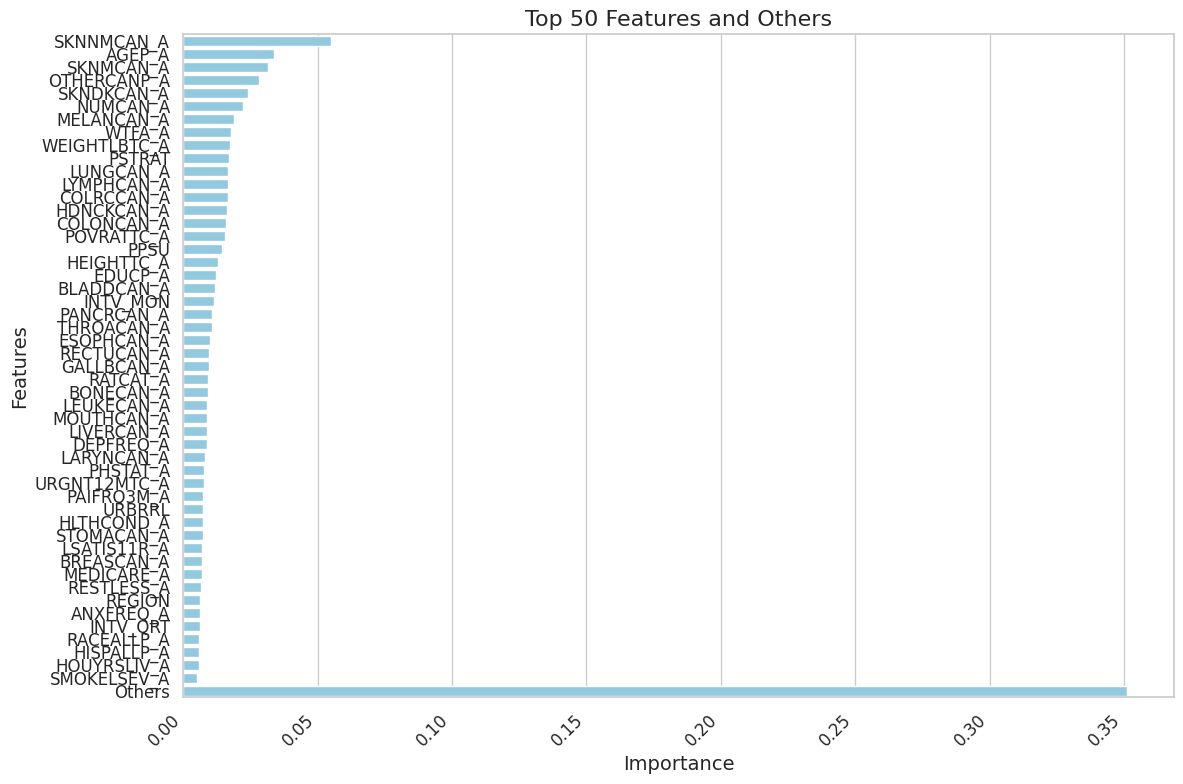

In [53]:
plot_top_features(feature_importance, top_n=50)

In [54]:
def add_cumulative_percentage(df):
    # Make sure the 'importance' column is numeric
    df['importance'] = pd.to_numeric(df['importance'], errors='coerce')

    # Calculate cumulative percentage
    df['cumulative_percentage'] = (df['importance'].cumsum() / df['importance'].sum()) * 100

    # Fill any NaN values with 0 in case there are missing values in 'importance' column
    df['cumulative_percentage'].fillna(0, inplace=True)

    return df

feature_importance = add_cumulative_percentage(feature_importance)

In [56]:
feature_importance.head(50)

,features,importance,cumulative_percentage
52,SKNNMCAN_A,0.054995,5.499465
75,AGEP_A,0.033629,8.862370
53,SKNMCAN_A,0.031392,12.001572
45,OTHERCANP_A,0.028233,14.824853
51,SKNDKCAN_A,0.024205,17.245384
44,NUMCAN_A,0.022092,19.454618
57,MELANCAN_A,0.018847,21.339275
206,WTFA_A,0.017551,23.094344
20,WEIGHTLBTC_A,0.017368,24.831187
4,PSTRAT,0.017134,26.544616


In [57]:
most_important_features = feature_importance.head(50).features.tolist()
X_train, X_test, y_train, y_test = train_test_split(feature_data[most_important_features], target_variable, test_size=0.2, random_state=42, stratify=target_variable)

In [58]:
print("Model performance after considering class imbalance")
rf_model = RandomForestClassifier(random_state=4212, class_weight={1:4,2:1,9:20,7:61})
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Evaluate the model using classification report
print("Classification report on the training set")
print(classification_report(y_train, y_train_pred))

# Make predictions on the testing set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model using classification report
print("Classification report on the testing set")
print(classification_report(y_test, y_test_pred))

Model performance after considering class imbalance
Classification report on the training set
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       356
         2.0       1.00      1.00      1.00       872
         7.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         6

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236

Classification report on the testing set
              precision    recall  f1-score   support

         1.0       0.88      0.64      0.74        89
         2.0       0.87      0.96      0.91       219
         9.0       1.00      1.00      1.00         2

    accuracy                           0.87       310
   macro avg       0.92      0.87      0.88       310
weighted avg       0.87      0.87      0.86       310



## Tuning Hyperparameters for better performance

In [59]:
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight={1:4,2:1,9:20,7:61})

# Define the hyperparameters and their possible values for tuning
param_dist = {
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,8],
    'bootstrap': [True, False]
}

# Use F1 score as the scoring metric
scorer = make_scorer(f1_score, average='weighted')  # Adjust 'average' parameter as needed

# Use RandomizedSearchCV for hyperparameter tuning with F1 score
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring=scorer, n_jobs=-1, random_state=4212)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the model on the test set using F1 score
y_pred = best_rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust 'average' parameter as needed
print("Test F1 Score:", f1)

/home/mikes/projects/prostate_cancer/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
Test F1 Score: 0.8690889287871955


In [60]:
print("Model performance after hyperparameters tuning")
# Make predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Evaluate the model using classification report
print("Classification report on the training set")
print(classification_report(y_train, y_train_pred))

# Make predictions on the testing set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model using classification report
print("Classification report on the testing set")
print(classification_report(y_test, y_test_pred))

Model performance after hyperparameters tuning
Classification report on the training set
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       356
         2.0       1.00      1.00      1.00       872
         7.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         6

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236

Classification report on the testing set
              precision    recall  f1-score   support

         1.0       0.80      0.73      0.76        89
         2.0       0.89      0.93      0.91       219
         9.0       1.00      1.00      1.00         2

    accuracy                           0.87       310
   macro avg       0.90      0.89      0.89       310
weighted avg       0.87      0.87      0.87       310

